In [1]:
# load libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
# import chardet

# with open('datasets/positivos_covid270720.csv', 'rb') as f:
#     result = chardet.detect(f.readline())  # or readline if the file is large
# df = pd.read_csv('datasets/positivos_covid24072020.csv')#, encoding=result['encoding'])
df = pd.read_csv("datasets/positivos_covid31072020.csv",usecols=[1,2,3,4,5,6,7],parse_dates=[6])#,header=0, encoding="ISO-8859-1")

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422183 entries, 0 to 422182
Data columns (total 7 columns):
DEPARTAMENTO       422183 non-null object
PROVINCIA          422183 non-null object
DISTRITO           422183 non-null object
METODODX           422183 non-null object
EDAD               422163 non-null float64
SEXO               422183 non-null object
FECHA_RESULTADO    422183 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 22.5+ MB


In [3]:
df.head()


,DEPARTAMENTO,PROVINCIA,DISTRITO,METODODX,EDAD,SEXO,FECHA_RESULTADO
0,CAJAMARCA,JAEN,JAEN,PCR,64.0,MASCULINO,2020-07-15
1,LIMA,EN INVESTIGACIÓN,EN INVESTIGACIÓN,PCR,68.0,MASCULINO,2020-07-16
2,LIMA,LIMA,LOS OLIVOS,PCR,52.0,MASCULINO,2020-07-16
3,LIMA,EN INVESTIGACIÓN,EN INVESTIGACIÓN,PCR,42.0,MASCULINO,2020-07-16
4,CALLAO,CALLAO,BELLAVISTA,PCR,34.0,MASCULINO,2020-07-16


In [8]:
# filter to include only data labeled as 'Violence Against the Person'
filtered = df['PROVINCIA'] == 'URUBAMBA'
infected = df[filtered]
#clean data ambiguity
infected = infected.replace(regex={'Á':'A','É':'E','Í':'I','Ó':'O','Ú':'U','À':'A','È':'E','Ì':'I','Ò':'O','Ù':'U'})
infected


,DEPARTAMENTO,PROVINCIA,DISTRITO,METODODX,EDAD,SEXO,FECHA_RESULTADO
10237,CUSCO,URUBAMBA,CHINCHERO,PCR,28.0,FEMENINO,2020-07-17
12291,CUSCO,URUBAMBA,URUBAMBA,PCR,30.0,MASCULINO,2020-06-23
16889,CUSCO,URUBAMBA,URUBAMBA,PCR,11.0,FEMENINO,2020-06-06
16890,CUSCO,URUBAMBA,URUBAMBA,PCR,27.0,MASCULINO,2020-06-06
18136,CUSCO,URUBAMBA,CHINCHERO,PCR,28.0,MASCULINO,2020-07-18
...,...,...,...,...,...,...,...
412539,CUSCO,URUBAMBA,MACHUPICCHU,PR,56.0,MASCULINO,2020-06-23
413782,CUSCO,URUBAMBA,MACHUPICCHU,PR,64.0,MASCULINO,2020-07-03
413802,CUSCO,URUBAMBA,YUCAY,PR,72.0,MASCULINO,2020-07-02
416103,CUSCO,URUBAMBA,OLLANTAYTAMBO,PR,36.0,MASCULINO,2020-05-13


In [9]:
distritos = infected['DISTRITO'].unique().tolist()
distritos

['CHINCHERO',
 'URUBAMBA',
 'OLLANTAYTAMBO',
 'MARAS',
 'MACHUPICCHU',
 'HUAYLLABAMBA',
 'YUCAY']

In [10]:
# data format
date_test = 'FECHA_RESULTADO'

infected[date_test] = pd.to_datetime(infected[date_test],format='%d/%m/%Y')
infected.style.format({date_test: lambda t: t.strftime("%Y-%m-%d")})
infected

,DEPARTAMENTO,PROVINCIA,DISTRITO,METODODX,EDAD,SEXO,FECHA_RESULTADO
10237,CUSCO,URUBAMBA,CHINCHERO,PCR,28.0,FEMENINO,2020-07-17
12291,CUSCO,URUBAMBA,URUBAMBA,PCR,30.0,MASCULINO,2020-06-23
16889,CUSCO,URUBAMBA,URUBAMBA,PCR,11.0,FEMENINO,2020-06-06
16890,CUSCO,URUBAMBA,URUBAMBA,PCR,27.0,MASCULINO,2020-06-06
18136,CUSCO,URUBAMBA,CHINCHERO,PCR,28.0,MASCULINO,2020-07-18
...,...,...,...,...,...,...,...
412539,CUSCO,URUBAMBA,MACHUPICCHU,PR,56.0,MASCULINO,2020-06-23
413782,CUSCO,URUBAMBA,MACHUPICCHU,PR,64.0,MASCULINO,2020-07-03
413802,CUSCO,URUBAMBA,YUCAY,PR,72.0,MASCULINO,2020-07-02
416103,CUSCO,URUBAMBA,OLLANTAYTAMBO,PR,36.0,MASCULINO,2020-05-13


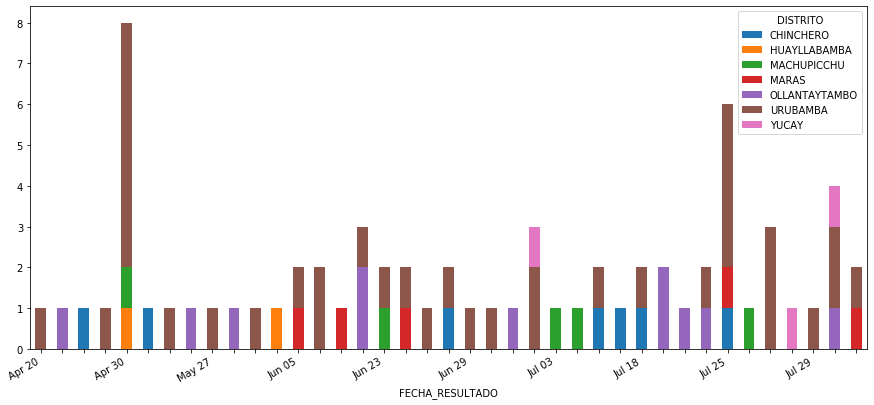

In [11]:
import matplotlib.ticker as ticker
df2 = infected.groupby(['DISTRITO',date_test])['DISTRITO'].count().unstack('DISTRITO').fillna(0)
#df2.plot(kind='bar', stacked=True)
#plot data
fig, ax = plt.subplots(figsize=(15,7))
#df2.plot(kind='bar', stacked=True, ax=ax)

df2.plot(kind='bar', stacked=True,ax=ax)

#Make most of the ticklabels empty so the labels don't get too crowded
ticklabels = ['']*len(df2.index)
# Every 4th ticklable shows the month and day
ticklabels[::4] = [item.strftime('%b %d') for item in df2.index[::4]]
# Every 12th ticklabel includes the year
#ticklabels[::12] = [item.strftime('%b %d\n%Y') for item in df2.index[::12]]

ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))
plt.gcf().autofmt_xdate()

plt.show()